Import Packages

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [4]:
parent_dir = '../../data/fjthrput/'

N = 10_000
A = 5_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/throughput_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/throughput_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/throughput_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/throughput_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [5]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 12:35:49 2025 +0200) (510.26ms elap...,0.456,0.0283,0.483,1.09,0.20,13.56,54.29 C,Nominal
1,(Tue Apr 1 12:35:50 2025 +0200) (509.30ms elap...,1.410,0.0546,0.535,2.07,0.37,26.74,54.29 C,Nominal
2,(Tue Apr 1 12:35:50 2025 +0200) (509.95ms elap...,0.309,0.0188,0.459,0.83,0.20,13.31,53.97 C,Nominal
3,(Tue Apr 1 12:35:51 2025 +0200) (509.05ms elap...,0.455,0.0168,0.462,0.96,0.23,16.46,53.97 C,Nominal
4,(Tue Apr 1 12:35:51 2025 +0200) (505.60ms elap...,1.120,0.0279,0.461,1.66,0.25,18.56,53.64 C,Nominal


In [6]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(83, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 12:36:01 2025 +0200) (1009.29ms ela...,32.5,0.0447,1.130,34.93,3.96,99.36,55.79 C,Nominal
1,(Tue Apr 1 12:36:02 2025 +0200) (1004.51ms ela...,28.5,0.0380,0.679,31.15,3.96,99.34,58.30 C,Nominal
2,(Tue Apr 1 12:36:03 2025 +0200) (1005.20ms ela...,29.1,0.0358,0.731,31.86,3.96,99.32,60.59 C,Nominal
3,(Tue Apr 1 12:36:04 2025 +0200) (1005.02ms ela...,28.6,0.0313,0.681,31.33,3.96,99.36,62.30 C,Nominal
4,(Tue Apr 1 12:36:05 2025 +0200) (1004.13ms ela...,28.8,0.0389,0.676,31.48,3.96,99.31,63.80 C,Nominal


In [7]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 12:40:21 2025 +0200) (511.80ms elap...,1.5900,0.0000,0.363,1.82,0.37,28.27,48.58 C,Nominal
1,(Tue Apr 1 12:40:22 2025 +0200) (506.28ms elap...,5.4300,0.0306,0.489,6.03,1.06,99.95,48.58 C,Nominal
2,(Tue Apr 1 12:40:22 2025 +0200) (506.16ms elap...,2.3100,0.0000,0.434,2.55,0.35,24.86,48.58 C,Nominal
3,(Tue Apr 1 12:40:23 2025 +0200) (507.83ms elap...,0.0593,0.0000,0.261,0.10,0.04,2.57,48.58 C,Nominal
4,(Tue Apr 1 12:40:23 2025 +0200) (508.55ms elap...,0.0714,0.0000,0.260,0.12,0.03,2.47,48.57 C,Nominal


In [8]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(577, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 12:40:33 2025 +0200) (1007.42ms ela...,29.4,0.00000,0.748,30.13,3.86,98.38,52.22 C,Nominal
1,(Tue Apr 1 12:40:34 2025 +0200) (1004.69ms ela...,27.3,0.00000,0.513,27.95,3.76,97.65,55.24 C,Nominal
2,(Tue Apr 1 12:40:35 2025 +0200) (1004.34ms ela...,27.9,0.00000,0.515,28.53,3.79,97.40,57.77 C,Nominal
3,(Tue Apr 1 12:40:36 2025 +0200) (1004.57ms ela...,28.6,0.00334,0.644,29.35,3.80,97.14,59.92 C,Nominal
4,(Tue Apr 1 12:40:37 2025 +0200) (1004.70ms ela...,28.0,0.00000,0.519,28.68,3.77,96.70,61.76 C,Nominal


Clean the Data

In [9]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [10]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [11]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 12:35:49,0.456,0.0283,0.483,1.09,0.20,13.56,54.29,Nominal,510.26
1,2025-04-01 12:35:50,1.410,0.0546,0.535,2.07,0.37,26.74,54.29,Nominal,509.30
2,2025-04-01 12:35:50,0.309,0.0188,0.459,0.83,0.20,13.31,53.97,Nominal,509.95
3,2025-04-01 12:35:51,0.455,0.0168,0.462,0.96,0.23,16.46,53.97,Nominal,509.05
4,2025-04-01 12:35:51,1.120,0.0279,0.461,1.66,0.25,18.56,53.64,Nominal,505.60


In [12]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(83, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 12:36:01,32.5,0.0447,1.130,34.93,3.96,99.36,55.79,Nominal,1009.29
1,2025-04-01 12:36:02,28.5,0.0380,0.679,31.15,3.96,99.34,58.30,Nominal,1004.51
2,2025-04-01 12:36:03,29.1,0.0358,0.731,31.86,3.96,99.32,60.59,Nominal,1005.20
3,2025-04-01 12:36:04,28.6,0.0313,0.681,31.33,3.96,99.36,62.30,Nominal,1005.02
4,2025-04-01 12:36:05,28.8,0.0389,0.676,31.48,3.96,99.31,63.80,Nominal,1004.13


In [13]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 12:40:21,1.5900,0.0000,0.363,1.82,0.37,28.27,48.58,Nominal,511.80
1,2025-04-01 12:40:22,5.4300,0.0306,0.489,6.03,1.06,99.95,48.58,Nominal,506.28
2,2025-04-01 12:40:22,2.3100,0.0000,0.434,2.55,0.35,24.86,48.58,Nominal,506.16
3,2025-04-01 12:40:23,0.0593,0.0000,0.261,0.10,0.04,2.57,48.58,Nominal,507.83
4,2025-04-01 12:40:23,0.0714,0.0000,0.260,0.12,0.03,2.47,48.57,Nominal,508.55


In [14]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(577, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 12:40:33,29.4,0.00000,0.748,30.13,3.86,98.38,52.22,Nominal,1007.42
1,2025-04-01 12:40:34,27.3,0.00000,0.513,27.95,3.76,97.65,55.24,Nominal,1004.69
2,2025-04-01 12:40:35,27.9,0.00000,0.515,28.53,3.79,97.40,57.77,Nominal,1004.34
3,2025-04-01 12:40:36,28.6,0.00334,0.644,29.35,3.80,97.14,59.92,Nominal,1004.57
4,2025-04-01 12:40:37,28.0,0.00000,0.519,28.68,3.77,96.70,61.76,Nominal,1004.70


Visualize the Data

In [15]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


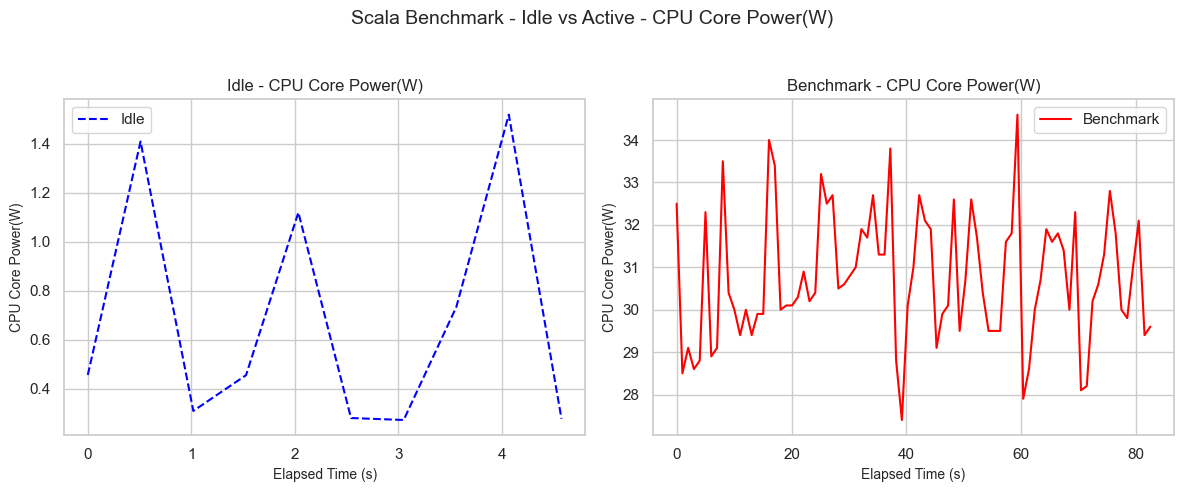

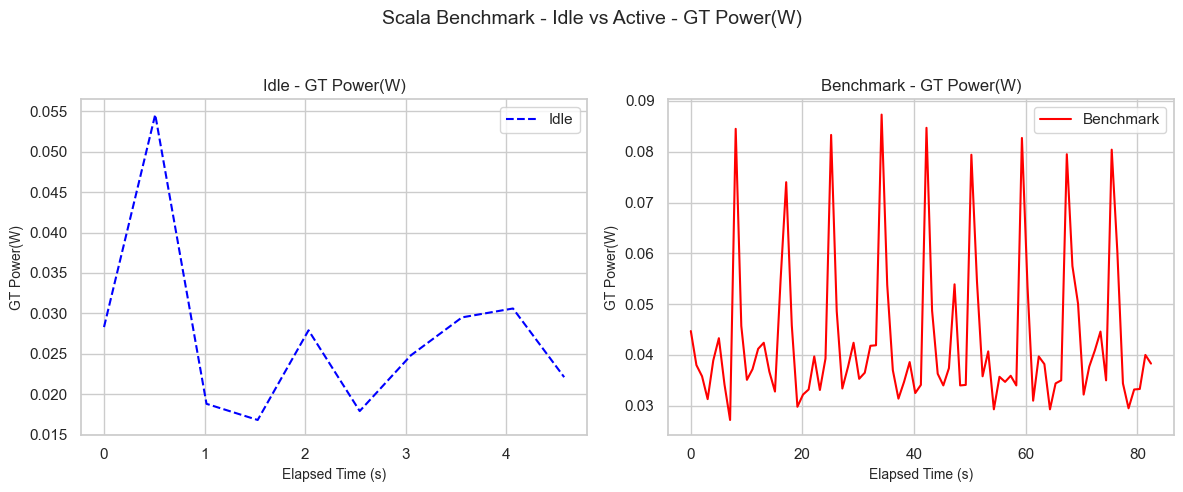

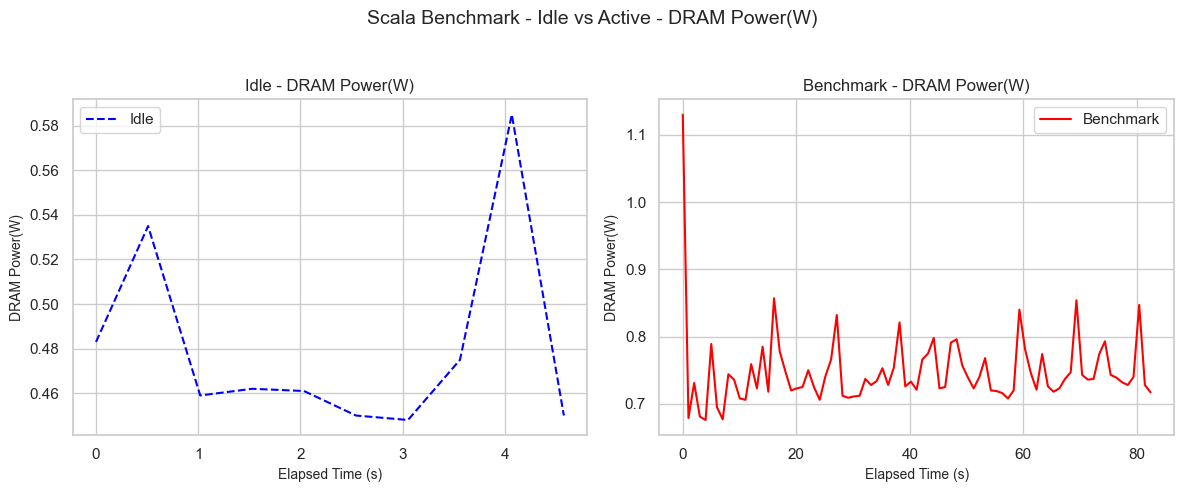

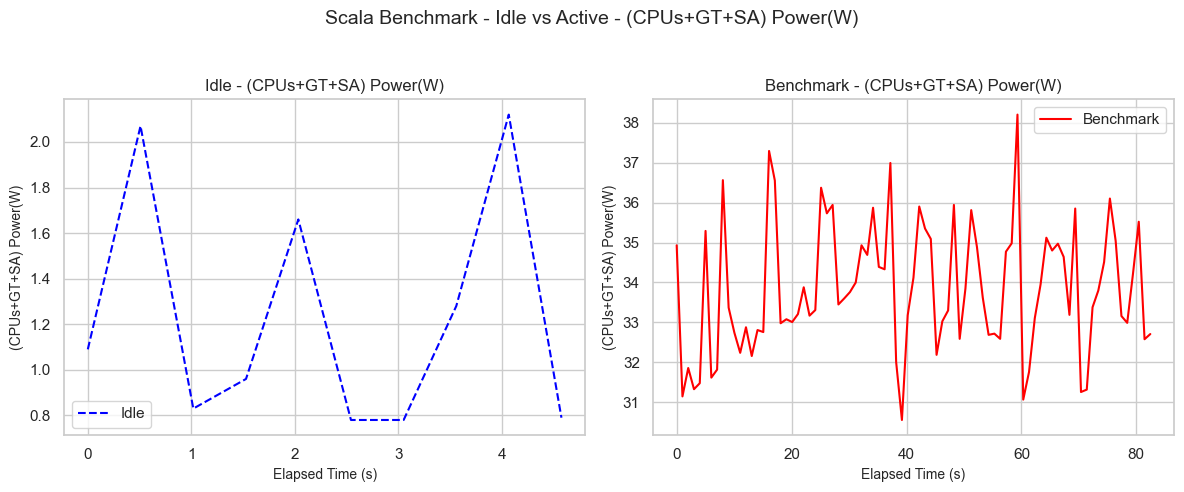

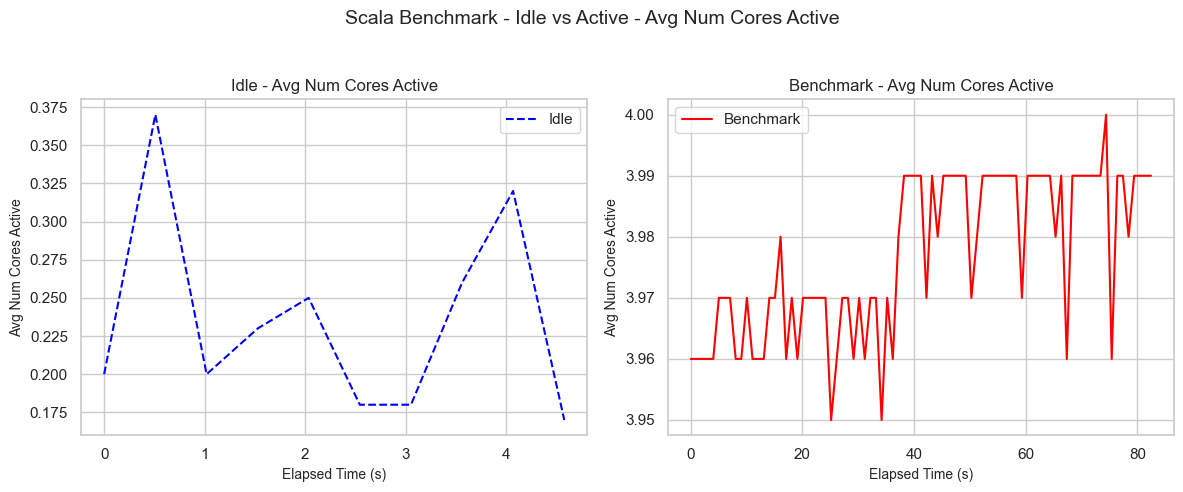

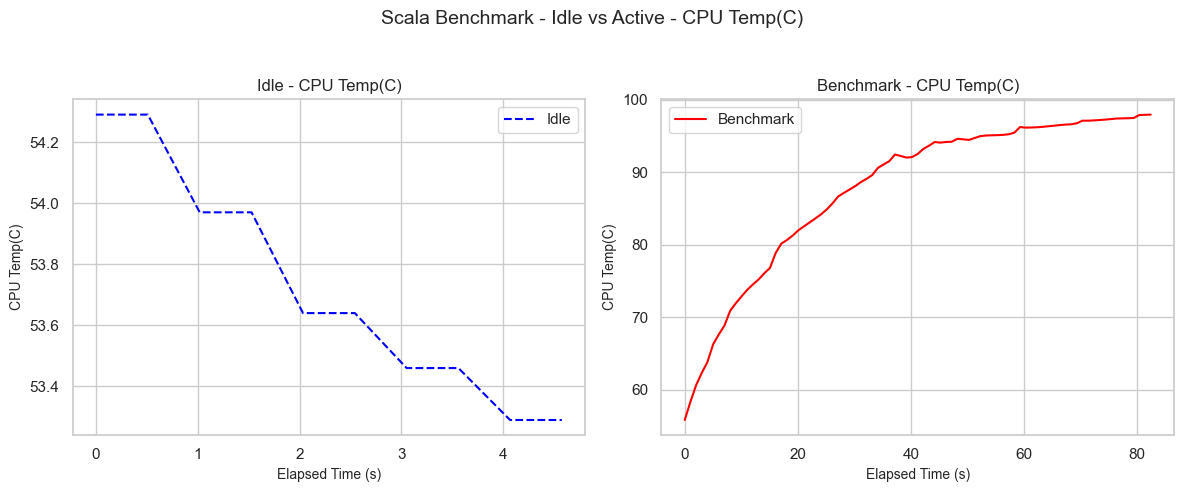

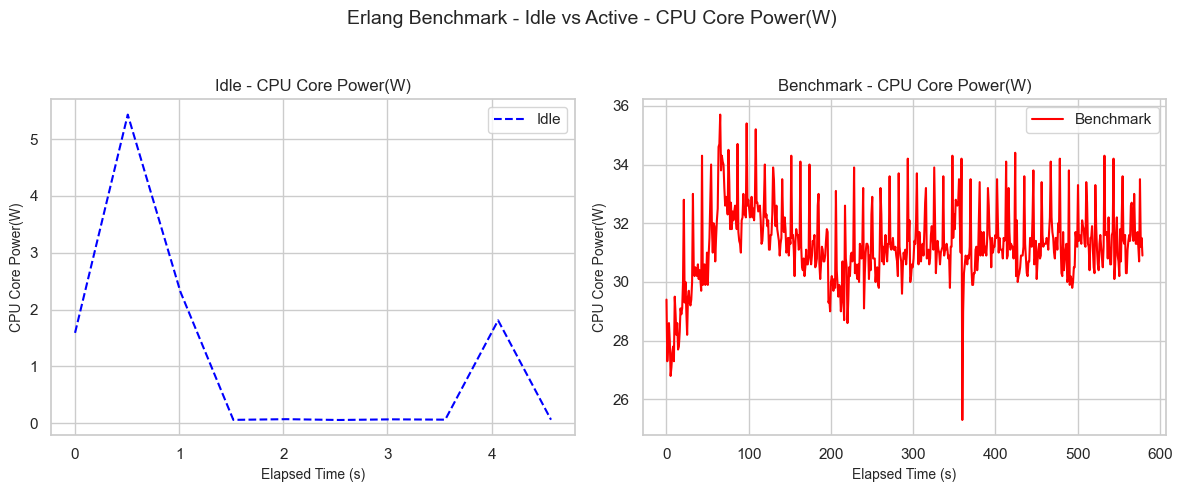

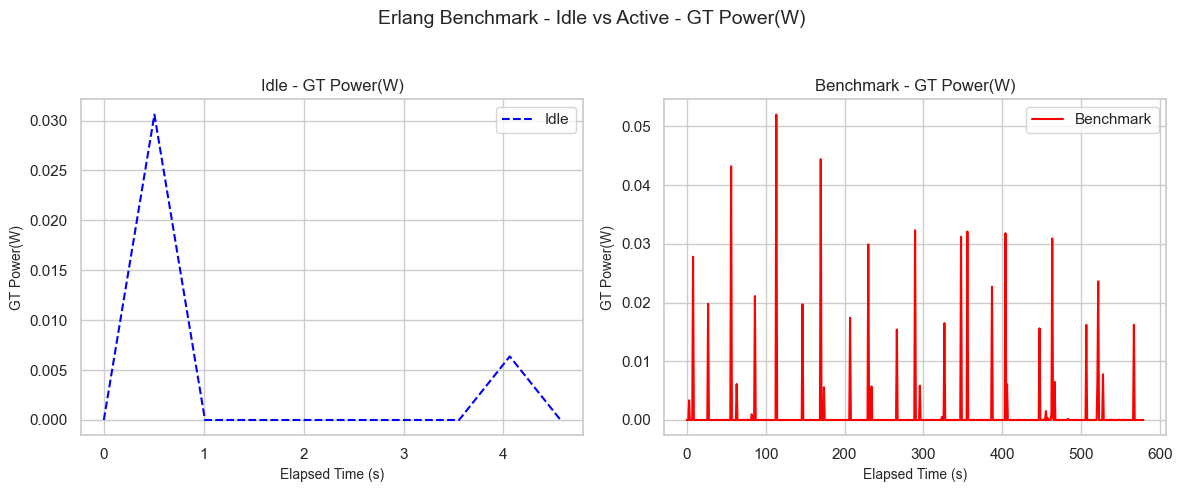

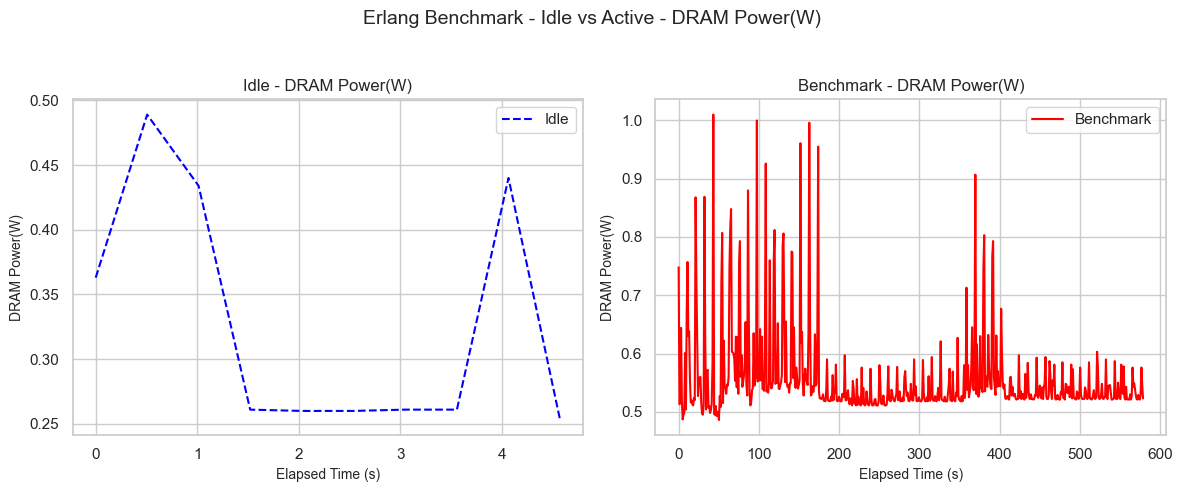

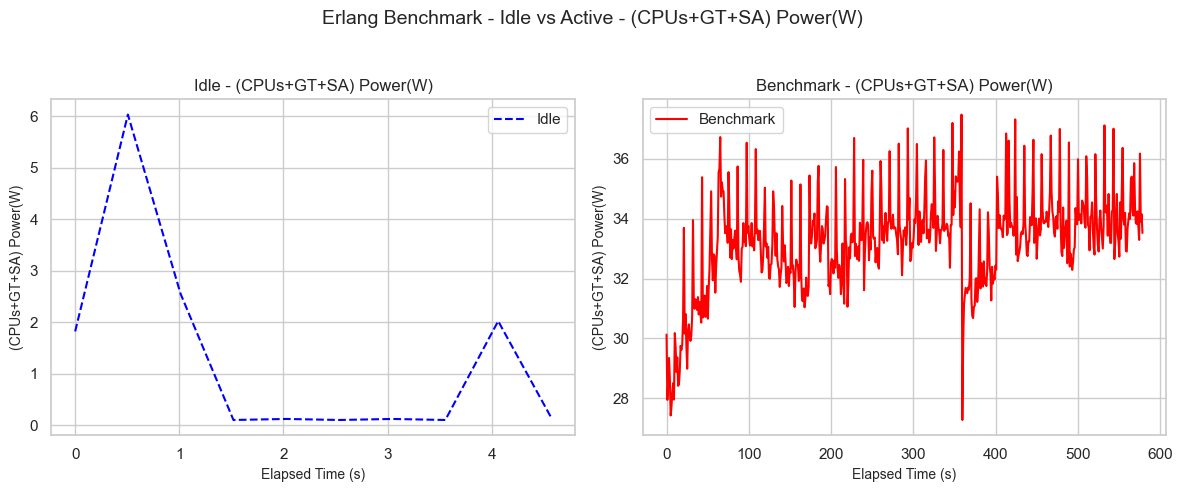

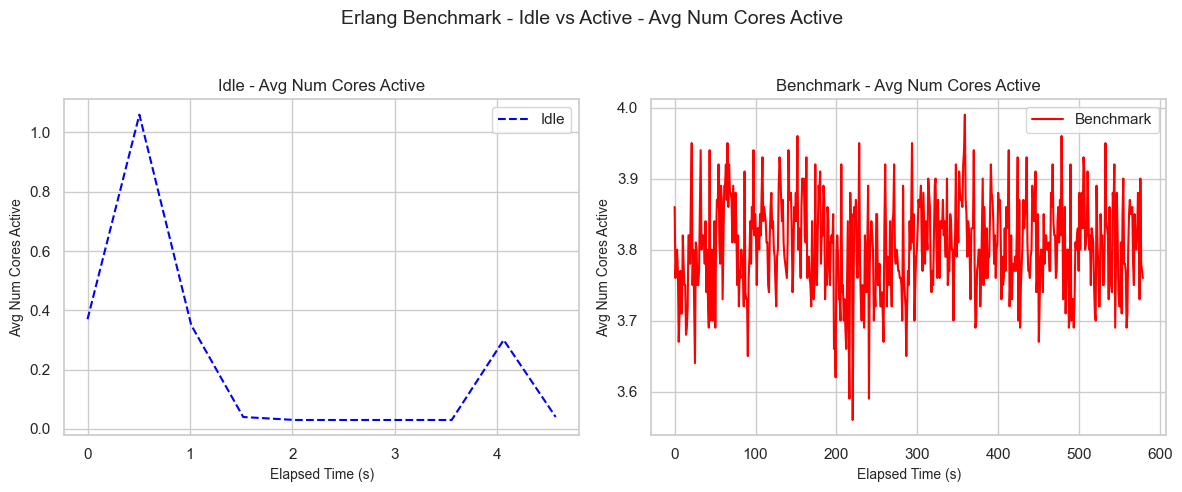

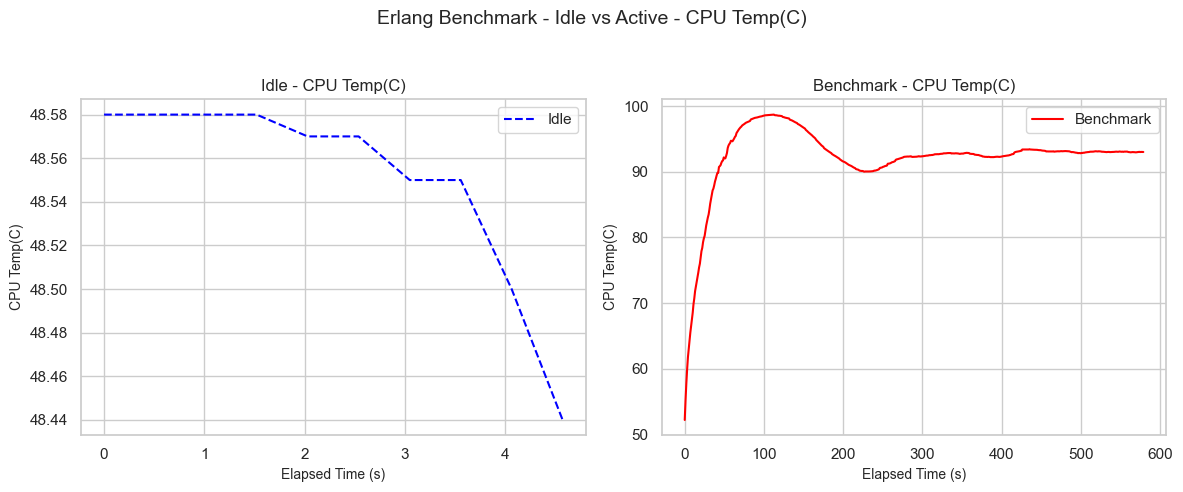

In [16]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [17]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [18]:
def format_number_str(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

n = format_number_str(N)
a = format_number_str(A)
title_config_prefix = f"({a} Actors, {n} Messages, {ITERATIONS} Iterations)"

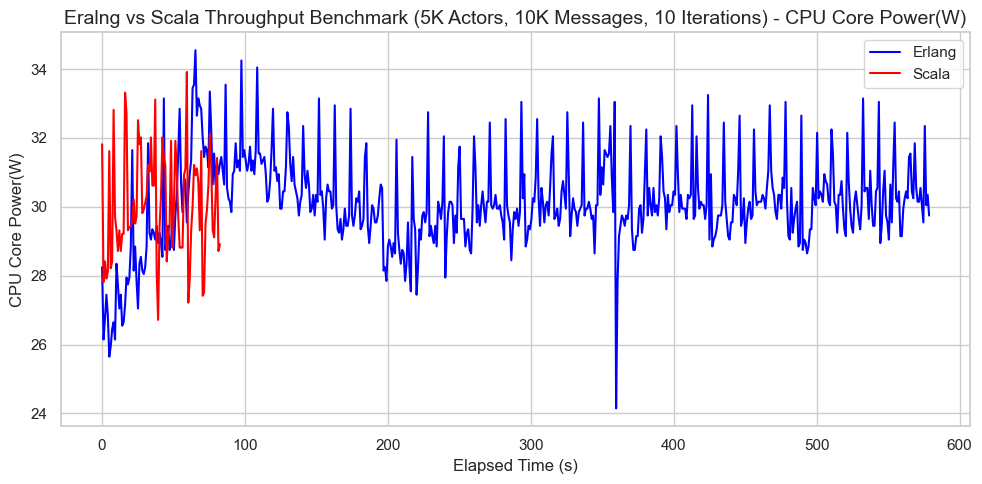

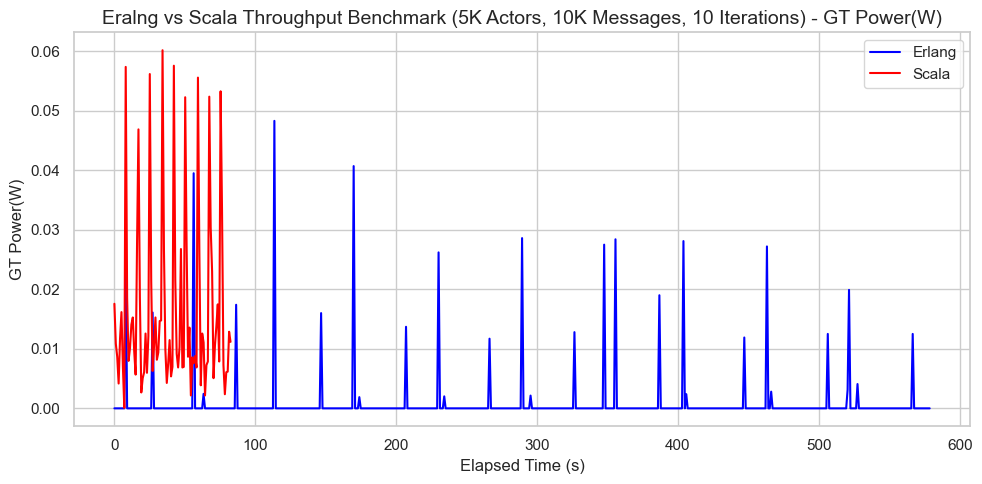

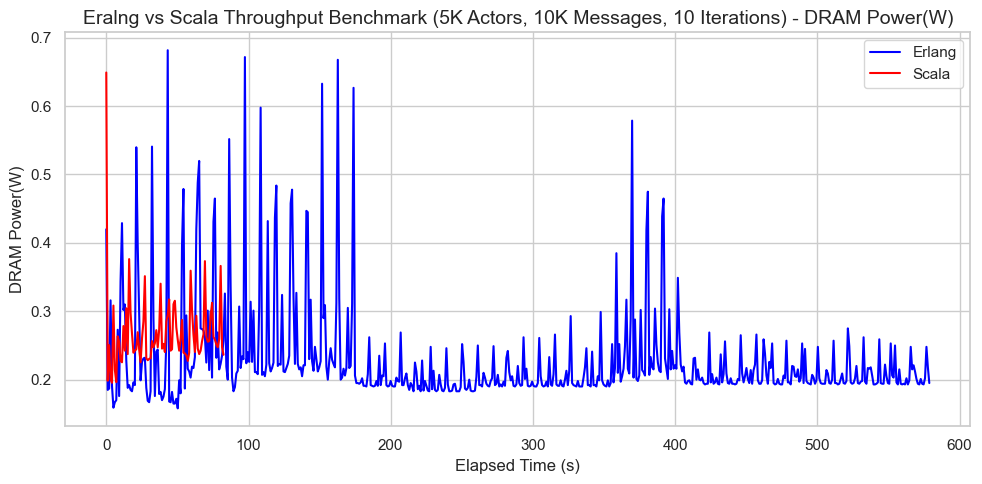

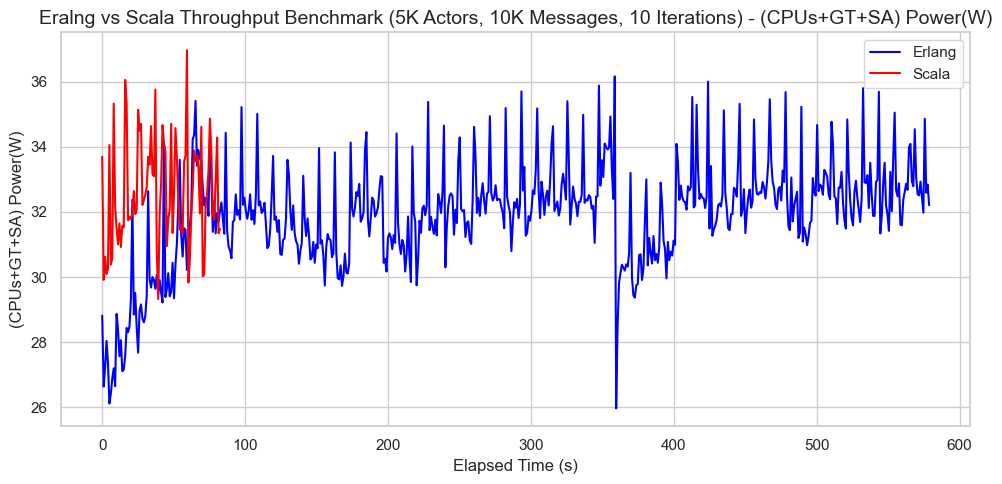

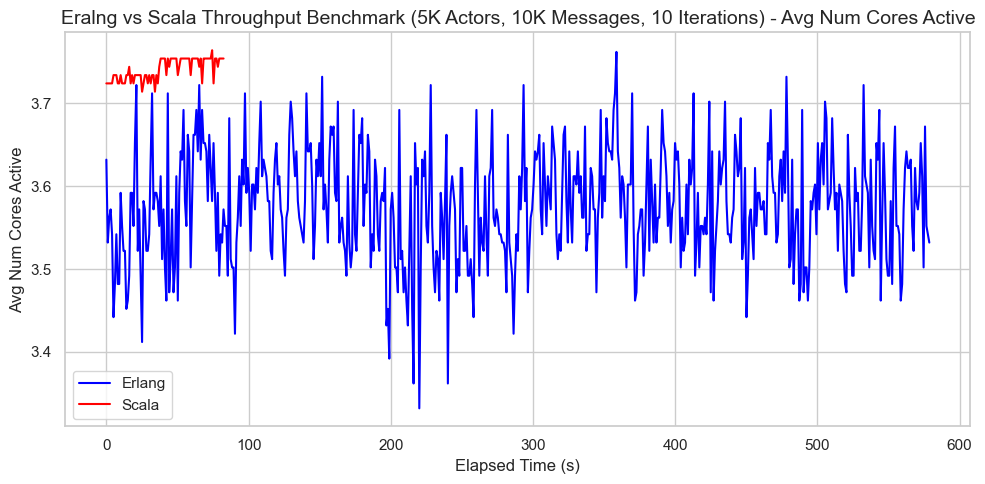

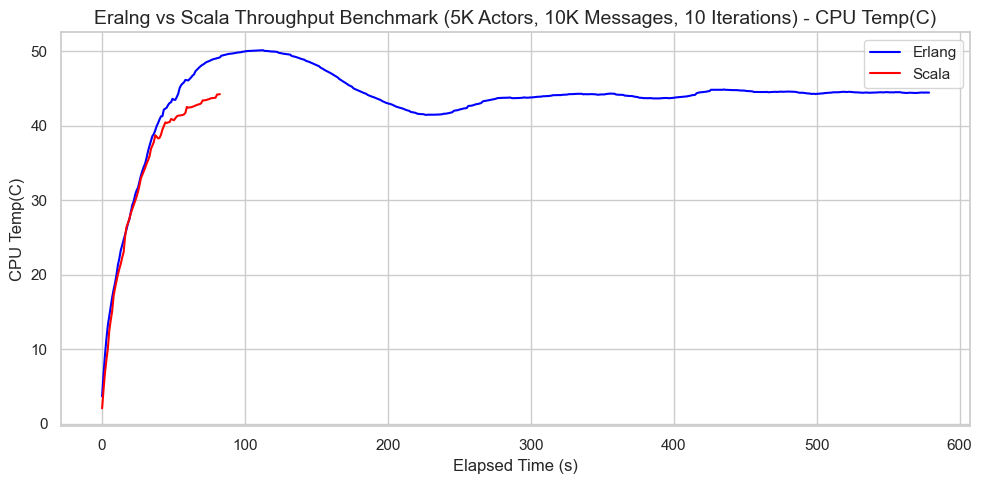

In [19]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Throughput Benchmark {title_config_prefix}")


Compute Average Metrics

In [20]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [21]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.062483
GT Power(W)               0.016180
DRAM Power(W)             0.267333
(CPUs+GT+SA) Power(W)    32.594723
CPU Temp(C)              34.102410
Avg Num Cores Active      3.740867
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.123657
GT Power(W)              -0.002624
DRAM Power(W)             0.228415
(CPUs+GT+SA) Power(W)    31.908671
CPU Temp(C)              43.630572
Avg Num Cores Active      3.576437
dtype: float64


Compute Total Energy Consumption

In [22]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "A": A,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["A"] == A) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "A =", A, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/fjthrput/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 2719.586663017109 Joules
Erlang Benchmark: 18496.97969537813 Joules
